# Brest Cancer Prediction

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/code?datasetId=180&sortBy=voteCount

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()  # embeded dataset
df = pd.DataFrame(np.c_[cancer['target'], cancer['data']],
                  columns= np.append(['MB'], cancer['feature_names']))
n_samples, n_features = cancer.data.shape

## Data Exploration

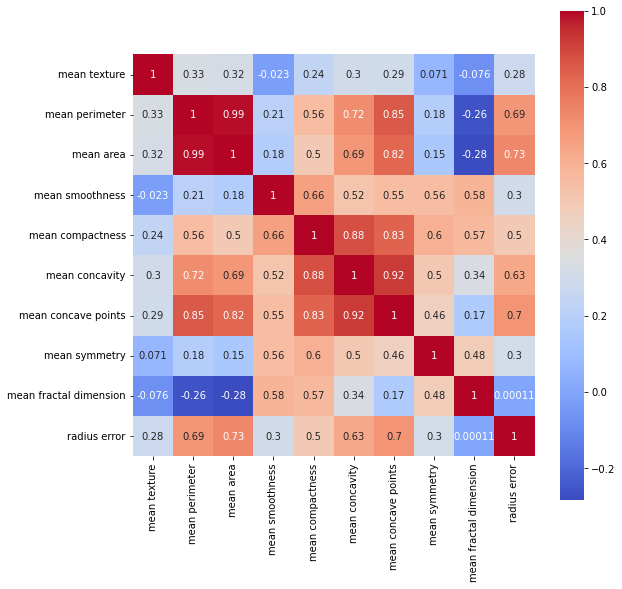

In [4]:
featureMeans = list(df.columns[2:12])
plt.figure(figsize=(9,9))
sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

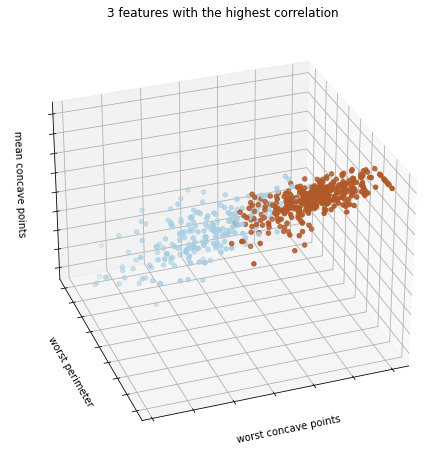

In [5]:
# Then we consider 3 features with highest correlation 
# coefficient with target variable(MB).
from mpl_toolkits.mplot3d import Axes3D
X = df.loc[:, ['worst concave points', 'worst perimeter']].values
Y = cancer.target
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = df.loc[:, ['worst concave points', 
                       'worst perimeter',
                       'mean concave points']].values
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
           X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.set_title("3 features with the highest correlation")
ax.set_xlabel("worst concave points")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("worst perimeter")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("mean concave points")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
X = df.drop('MB', axis = 1)
y = df['MB']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model_accuracy = {}

## Models

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

best score:  0.9406006738701057
best parameters:  {'criterion': 'gini', 'max_depth': 9}
best estimator:  DecisionTreeClassifier(max_depth=9, random_state=22)


Prediction Accuracy:  0.9385964912280702


confusion matrix: 
[[39  4]
 [ 3 68]]


classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        43
         1.0       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

The AUC stats is:  0.932361611529643
The kappa stats is:  0.8687068114511353
The MCC stats is:  0.868859654660177


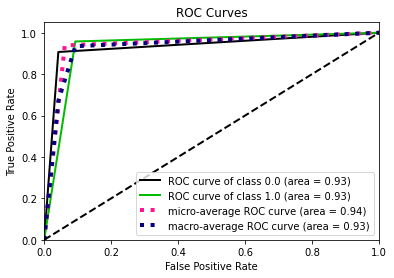

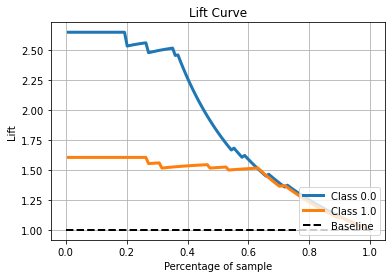

In [10]:
i_range = list(range(1,10))
criterion_options = ['gini', 'entropy']
param_grid = dict(max_depth=i_range, criterion=criterion_options)
clf = DecisionTreeClassifier(random_state=22)
m_dt = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
m_dt.fit(X_train, y_train)
y_pred = m_dt.predict(X_test)

model_accuracy['Decision Tree'] = accuracy_score(y_test, y_pred)

print ('best score: ', m_dt.best_score_)
print ('best parameters: ', m_dt.best_params_)
print ('best estimator: ', m_dt.best_estimator_)
print('\n')
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('classification report: ')
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC stats is: ", auc)
print("The kappa stats is: ", cohen_kappa_score(y_test, y_pred))
print("The MCC stats is: ", matthews_corrcoef(y_test, y_pred))

# ROC curve
predicted_probas_dt = m_dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas_dt)

# Lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_dt)
plt.show()

### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

best score:  0.9603956082258627
best parameters:  {'n_neighbors': 7, 'weights': 'uniform'}
best estimator:  KNeighborsClassifier(n_neighbors=7)


Prediction Accuracy:  0.9649122807017544


confusion matrix: 
[[41  2]
 [ 2 69]]


classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

The AUC stats is:  0.9626596790042582
The kappa stats is:  0.9253193580085162
The MCC stats is:  0.9253193580085162


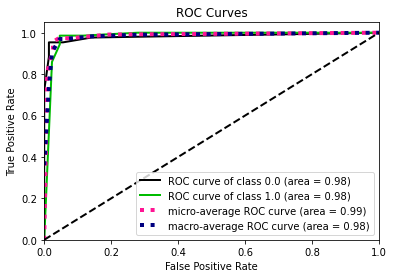

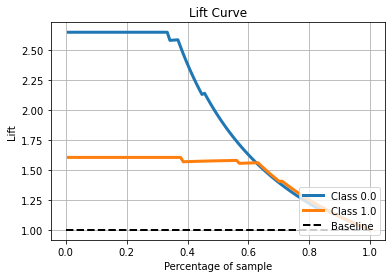

In [12]:
k_range = list(range(1, 10))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = KNeighborsClassifier()
m_knn = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy', return_train_score=True, n_jobs=-1)
m_knn.fit(X_train_scaled ,y_train)

y_pred = m_knn.predict(X_test_scaled)

model_accuracy['KNN'] = accuracy_score(y_test, y_pred)

print ('best score: ', m_knn.best_score_)
print ('best parameters: ', m_knn.best_params_)
print ('best estimator: ', m_knn.best_estimator_)
print('\n')
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('classification report: ')
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC stats is: ", auc)
print("The kappa stats is: ", cohen_kappa_score(y_test, y_pred))
print("The MCC stats is: ", matthews_corrcoef(y_test, y_pred))

# ROC curve
predicted_probas_knn = m_knn.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, predicted_probas_knn)

# Lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_knn)
plt.show()

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

best score:  0.9647960962007668
best parameters:  {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
best estimator:  LogisticRegression(C=1000, solver='newton-cg')


Prediction Accuracy:  0.9824561403508771


confusion matrix: 
[[42  1]
 [ 1 70]]


classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

The AUC stats is:  0.9813298395021289
The kappa stats is:  0.9626596790042581
The MCC stats is:  0.9626596790042581


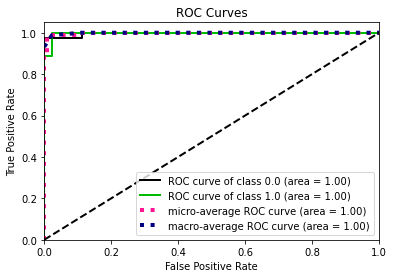

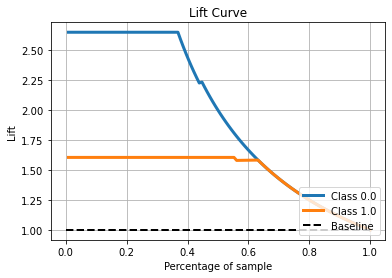

In [14]:
a = list(range(-5, 10))
complexity_values = [10**i for i in a]
#xticks = list(range(1, len(complexity_values)+1))
param_values = {'C':complexity_values, 'penalty': ['l1', 'l2', 'elasticnet', 'none'],'solver':['liblinear','newton-cg']}

clf = LogisticRegression()
m_lr = GridSearchCV(clf, param_grid=param_values, cv = 3, scoring = 'accuracy', return_train_score=True, n_jobs=-1)
m_lr.fit(X_train ,y_train)

y_pred = m_lr.predict(X_test)

model_accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred)

print ('best score: ', m_lr.best_score_)
print ('best parameters: ', m_lr.best_params_)
print ('best estimator: ', m_lr.best_estimator_)
print('\n')
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('classification report: ')
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC stats is: ", auc)
print("The kappa stats is: ", cohen_kappa_score(y_test, y_pred))
print("The MCC stats is: ", matthews_corrcoef(y_test, y_pred))

# ROC curve
predicted_probas_lr = m_lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas_lr)

# Lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_lr)
plt.show()

### SVM

In [15]:
from sklearn.svm import SVC

best score:  0.9780219780219781
best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
best estimator:  SVC(C=1, gamma=1, probability=True, random_state=45)


Prediction Accuracy:  0.9736842105263158


confusion matrix: 
[[41  2]
 [ 1 70]]


classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

The AUC stats is:  0.969701932525385
The kappa stats is:  0.9437314906219151
The MCC stats is:  0.9438975339262832


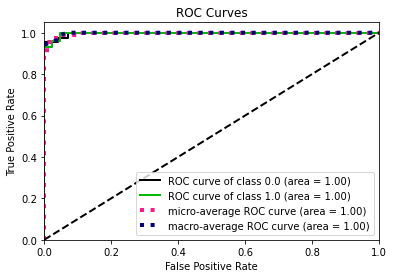

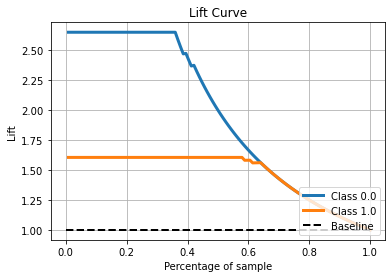

In [16]:
svm = SVC(random_state = 45,probability = True)
param_grid = {'kernel':['linear','rbf'],'C':[0.1, 1, 10, 100],'gamma':[.1, .3, .5, 1]} 
m_svm = GridSearchCV(svm, param_grid, cv = 5, scoring='accuracy')

m_svm.fit(X_train_scaled, y_train)
y_pred = m_svm.predict(X_test_scaled)

model_accuracy['SVM'] = accuracy_score(y_test, y_pred)

print ('best score: ', m_svm.best_score_)
print ('best parameters: ', m_svm.best_params_)
print ('best estimator: ', m_svm.best_estimator_)
print('\n')
print('Prediction Accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('classification report: ')
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC stats is: ", auc)
print("The kappa stats is: ", cohen_kappa_score(y_test, y_pred))
print("The MCC stats is: ", matthews_corrcoef(y_test, y_pred))

# ROC curve
predicted_probas_svm = m_svm.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, predicted_probas_svm)

# Lift curve
skplt.metrics.plot_lift_curve(y_test, predicted_probas_svm)
plt.show()

## Model Accuracy Comparison

In [17]:
model_accuracy

{'Decision Tree': 0.9385964912280702,
 'KNN': 0.9649122807017544,
 'Logistic Regression': 0.9824561403508771,
 'SVM': 0.9736842105263158}